<a href="https://colab.research.google.com/github/Sedighe-Raeisi/NLP-Sentiment-Analysis-/blob/main/1_Tweet_Sentiment_Prertrained_Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)

In [ ]:
neg=len(df[df['sentiment']=='negative'])
pos=len(df[df['sentiment']=='positive'])

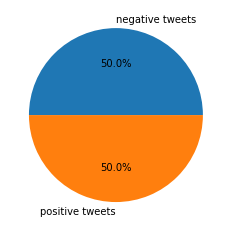

In [ ]:
plt.pie([neg,pos],labels=['negative tweets','positive tweets'], autopct='%2.1f%%');

#Importing data from link:
https://www.kaggle.com/kazanova/sentiment140

In [ ]:
!pip install kaggle

In [ ]:
!mkdir  -p /root/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/MachineLearning/kaggle.json -r /root/.kaggle/

In [ ]:
!chmod 600 ~ /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 96% 78.0M/80.9M [00:00<00:00, 151MB/s]
100% 80.9M/80.9M [00:00<00:00, 149MB/s]


In [ ]:
!cp /content/sentiment140.zip -r /content/drive/MyDrive/MachineLearning/NLP

In [ ]:
!unzip /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip -d /content/drive/MyDrive/MachineLearning/NLP

Archive:  /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip
  inflating: /content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv  


##Preparing the dataframe

In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
data=pd.read_csv(path
               ,encoding='latin-1'
               )

In [ ]:
data.columns

Index(['Unnamed: 0', 'sentiment', 'tweet', 'clean'], dtype='object')

In [ ]:
set(data['0'])

In [ ]:
df=pd.DataFrame()

In [ ]:
def sentiment(x):
  if x==4:
    return 'positive'
  elif x==0:
    return 'negative'

In [ ]:
df['sentiment']=data['0'].apply(lambda x: sentiment(x) )

In [ ]:
df['tweet']=data.iloc[:,5]

In [ ]:
del data

In [ ]:
df.head(2)

In [ ]:
df.isnull().sum()

In [ ]:
(set(df['sentiment']))

#Preprocessing:


##Preprocessing Tweets:

In [ ]:
df.head()

,sentiment,tweet
0,negative,is upset that he can't update his Facebook by ...
1,negative,@Kenichan I dived many times for the ball. Man...
2,negative,my whole body feels itchy and like its on fire
3,negative,"@nationwideclass no, it's not behaving at all...."
4,negative,@Kwesidei not the whole crew


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  sentence=sentence.replace('{@}',"")
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['clean']=df['tweet'].apply(lambda x: preprocess(x))

In [ ]:
df.to_csv(path)

In [ ]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64

In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)

In [ ]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64

In [ ]:
df.dropna(inplace=True)


##Preprocessing labels

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
le=LabelEncoder()

In [ ]:
y=le.fit_transform(df['sentiment'])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

# Word Embedding:

##We make our dictionary:

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['clean'])

##x:

In [ ]:
from keras.preprocessing.sequence import  pad_sequences

In [ ]:
sequences = tokenizer.texts_to_sequences(df['clean'])
data = pad_sequences(sequences, maxlen=50)
x=data


##Prepairing the embedding with pretrained Glove:


###Importing Pretrained Glove:

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# !cp /content/glove.6B.zip -r /content/drive/MyDrive/MachineLearning/NLP

In [ ]:
!cp /content/drive/MyDrive/MachineLearning/NLP/glove.6B.zip -r /content/

In [ ]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embeddings_index = dict()
f = open('/content/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

#### Creating Embedding Matrix:

In [ ]:
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

##Train Test Split:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=47, stratify=y, test_size=.2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1279324, 50) (319831, 50) (1279324,) (319831,)


#Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, LSTM, Dense

In [ ]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist=model_glove.fit(x_train, y_train, epochs=3, validation_split=.2, batch_size=625)

Epoch 1/3
1638/1638 [==============================] - 395s 239ms/step - loss: 0.6164 - accuracy: 0.6483 - val_loss: 0.5941 - val_accuracy: 0.6702
Epoch 2/3
1638/1638 [==============================] - 398s 243ms/step - loss: 0.5997 - accuracy: 0.6644 - val_loss: 0.5889 - val_accuracy: 0.6746
Epoch 3/3
1638/1638 [==============================] - 415s 254ms/step - loss: 0.5944 - accuracy: 0.6688 - val_loss: 0.5865 - val_accuracy: 0.6764


In [ ]:
model_glove.save('/content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/NLP/Glove_embedding_1/assets


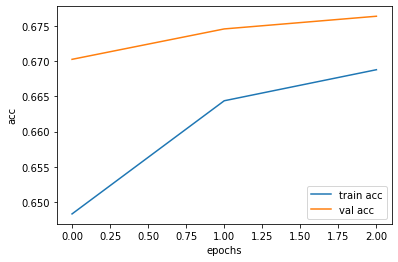

In [ ]:
plt.plot(hist.history['accuracy'],label='train acc')
plt.plot(hist.history['val_accuracy'],label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(loc='lower right')
plt.show();

#Score:

In [ ]:
pred=model_glove.predict(x_test)


In [ ]:
pred=pred.reshape(pred.shape[0])

In [ ]:
def step(x):
  if x>.5:
    return 1
  elif x<.5:
    return 0

In [ ]:
y_pred=list(map(step, pred))


In [ ]:
set(y_pred)

{0, 1}

In [ ]:
le.inverse_transform(np.array([0]))

array(['negative'], dtype=object)

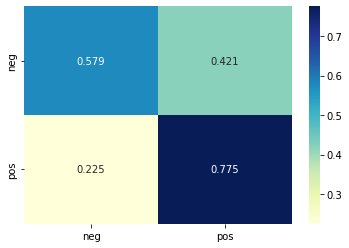

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred, normalize='true')

sn.heatmap(cm, annot=True, fmt='2.3f', 
           yticklabels=[ 'neg','pos'] ,
           xticklabels=[ 'neg','pos'] , 
           cmap='YlGnBu');

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.6770419377733866